In [59]:
import numpy as np
import matplotlib.pyplot as plt

In [60]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [61]:
def logit(p):
    return np.log(p / (1 - p))


In [62]:
z = np.arange(1, 5, 0.25)

In [63]:
z

array([1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  , 3.25, 3.5 ,
       3.75, 4.  , 4.25, 4.5 , 4.75])

In [64]:
logit(sigmoid(z))

array([1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  , 3.25, 3.5 ,
       3.75, 4.  , 4.25, 4.5 , 4.75])

In [72]:
def logistic_loss_and_grad(X, y, w):

    p = sigmoid(X @ w)

    eps = 1e-12
    p_clipped = np.clip(p, eps, 1.0 - eps)

    loss = -np.mean(y*np.log(p_clipped) + (1-y)*np.log(1-p_clipped))
    gradient = -(1/X.shape[0])*(X.T @ (y - p))

    return loss, gradient
    

In [73]:
def train_logistic(X, y, w, alpha=0.01, num_iters=1e5):

    terminal = False
    i = 0
    loss_history = []
    while not terminal:

        loss, gradient = logistic_loss_and_grad(X, y, w)
        loss_history.append(loss)
        w = w - alpha*gradient
        i = i + 1
        
        if i > num_iters:
            terminal = True
            
    return w, loss_history

In [74]:
def predict_proba(X, w):

    return sigmoid(X @ w)

In [75]:
def predict_labels(X, w, threshold):
    
    y_pred = predict_proba(X, w)
    y_labels = np.zeros((y_pred.shape[0],1))

    for i in range(len(y_pred)):
        if y_pred[i] > threshold:
            y_labels[i] = 1

    return y_labels

In [76]:
def accuracy(y_true, y_pred):
    
    correct_predictions = 0
    
    for i in range(len(y_pred)):
        if y_pred[i] == y_true[i]:
            correct_predictions = correct_predictions + 1
    
    return correct_predictions/y_pred.shape[0]

In [77]:
w_true = np.array([-0.5, 2, 1])

In [78]:
X_raw = np.random.randn(200, 2)

In [79]:
X = np.hstack ([np.ones((200,1)), X_raw])

In [80]:
z_true = X @ w_true

In [81]:
p_true = sigmoid(z_true)

In [82]:
y = (np.random.rand(200) < p_true).astype(int)

In [83]:
y.shape

(200,)

In [84]:
y = y.reshape(-1,1)

In [85]:
y.shape

(200, 1)

In [86]:
w = np.zeros(X.shape[1])

In [87]:
w = w.reshape(-1,1)

In [88]:
alpha = 0.1
num_iters = 1000

In [89]:
w_learned, loss_history = train_logistic(X, y, w)

In [90]:
w_learned

array([[-0.72907454],
       [ 1.8116462 ],
       [ 0.9132266 ]])

In [91]:
y_pred = predict_labels(X, w_learned, 0.5)

In [92]:
accuracy(y, y_pred)

0.805

In [116]:
b , w1 , w2 = w_learned

In [117]:
x_2 = -(b + w1*X[:,1])/w2 # Decision boundry

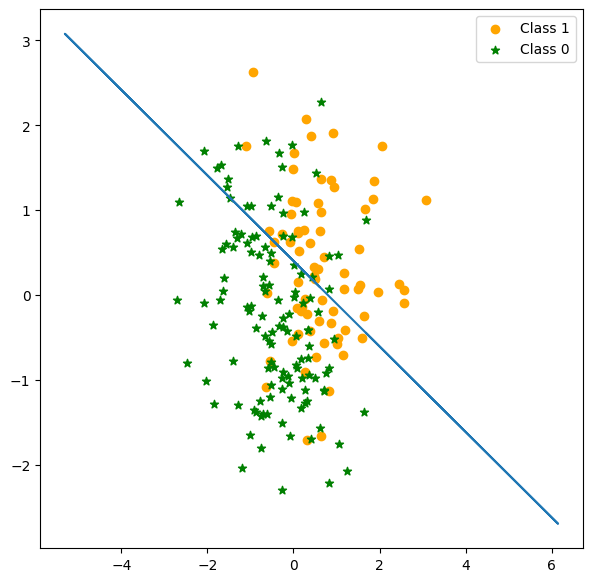

In [118]:
plt.figure(figsize=(7, 7))

# Create masks for the two classes
mask_1 = (y == 1).flatten()
mask_0 = (y == 0).flatten()

plt.scatter(X[mask_1, 1], X[mask_1, 2], marker='o', color='orange', label='Class 1')

plt.scatter(X[mask_0, 1], X[mask_0, 2], marker='*', color='green', label='Class 0')
plt.plot(x_2,X[:,1])

plt.legend()
plt.show()